# **Introduction**

This notebooks illustrate the work that has been done to analyze the data for Thankaa Traffic Safety challenge.



In [185]:
# importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import datetime
import seaborn as sns

%matplotlib inline

In [186]:
# Reading in the data
data = pd.read_csv('Accidents.csv')

# Checking the Data

In the following cells: I check the correlation between the numerical features, figure out the number of accidents as well as the number of features present. Then I move to survey the data.

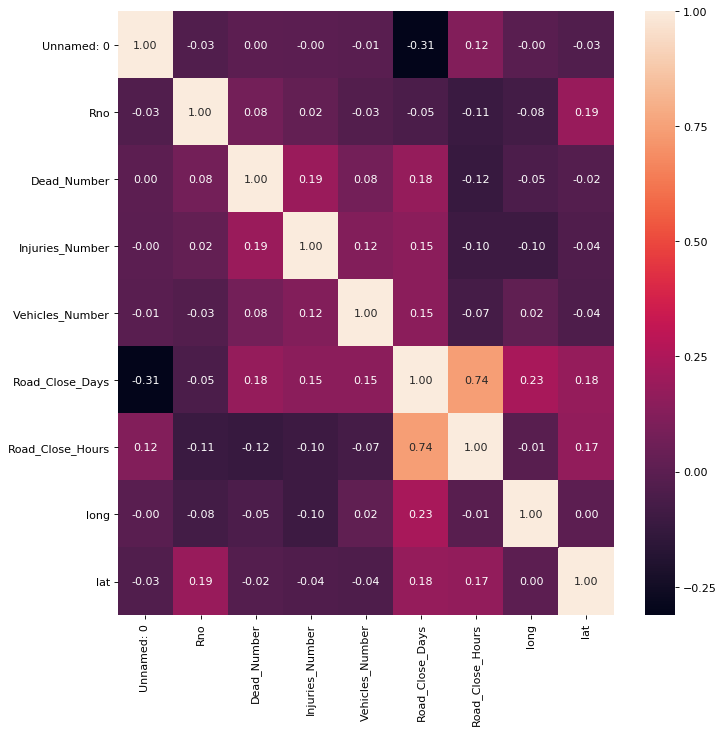

In [187]:
# Visualizing the correlation between numerical features

oo = data.drop(['Eyes', 'Car', 'Small_Truck', 'Big_Truck', 'Other_Car', 'Driver', 'Way','Vehicle', 'Animal', 'Paints'], axis=1)
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(oo.corr(), annot= True, fmt= '.2f')


In [4]:
# number of accidents and number of features
data.shape

(36016, 28)

In [184]:
data.describe()

,Unnamed: 0,Rno,Dead_Number,Injuries_Number,Car,Small_Truck,Big_Truck,Other_Car,Driver,Way,Vehicle,Animal,Vehicles_Number,Paints,Eyes,Road_Close_Days,Road_Close_Hours,long,lat
count,36016.000000,36016.000000,24727.000000,29384.000000,24219.0,4958.0,7949.0,333.0,27286.0,215.0,5836.0,418.0,33660.000000,35769.0,35762.0,96.000000,228.000000,27629.000000,27629.000000
mean,18007.500000,1039.309557,0.184818,1.006058,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.490137,1.0,1.0,20.802083,1.016009,42.983266,24.200144
std,10397.067984,2309.320528,0.621456,1.623716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.858436,0.0,0.0,7.880181,1.246447,3.486321,3.054086
min,0.000000,5.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,1.000000,0.050000,34.801405,16.444880
25%,9003.750000,40.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,15.000000,0.200000,39.953890,22.426535
50%,18007.500000,70.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,20.000000,0.500000,42.759093,24.530719
75%,27011.250000,500.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,1.0,1.0,25.000000,1.000000,45.941974,26.161332
max,36015.000000,9606.000000,21.000000,150.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,52.000000,1.0,1.0,45.000000,8.000000,52.517314,31.680048


In [6]:
data.head()

,Unnamed: 0,Accident_Time,Accident_Date_G,Rno,Road_Type,Region,Road_Status,Weather_Status,Dead_Number,Injuries_Number,...,Vehicle,Animal,Vehicles_Number,Paints,Eyes,Road_Close_Days,Road_Close_Hours,GEOMETRIC_RoadTYPE,long,lat
0,0,5:00 AM,16/04/2019,425,سريع مع خدمة,Qassim,Good,good,0.0,1.0,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,Straight link,43.999093,26.426746
1,1,12:15 PM,16/04/2019,414,مزدوج,Qassim,Good,good,0.0,1.0,...,NaN,NaN,2.0,1.0,1.0,NaN,NaN,Straight link,43.786877,26.057596
2,2,8:30 AM,15/04/2019,419,مزدوج,Qassim,Good,good,0.0,0.0,...,NaN,NaN,2.0,1.0,1.0,NaN,NaN,Straight link,43.772701,26.345146
3,3,8:30 PM,15/04/2019,60,سريع مع خدمة,Qassim,Good,good,0.0,0.0,...,NaN,NaN,2.0,1.0,1.0,NaN,NaN,Straight link,43.937996,26.205702
4,4,12:10 AM,14/04/2019,393,NaN,Hail,Good,good,NaN,NaN,...,NaN,NaN,2.0,1.0,1.0,NaN,NaN,Straight link,41.702023,27.555157


The following cell lists all the features present in the dataset

In [7]:
for col in data.columns:
    print(col)

Unnamed: 0
Accident_Time
Accident_Date_G
Rno
Road_Type
Region
Road_Status
Weather_Status
Dead_Number
Injuries_Number
Damage_Road_Type
Accident_Type
Car
Small_Truck
Big_Truck
Other_Car
Driver
Way
Vehicle
Animal
Vehicles_Number
Paints
Eyes
Road_Close_Days
Road_Close_Hours
GEOMETRIC_RoadTYPE
long
lat


The following two cells are a quicklook into the road_type feature

In [8]:
data.Road_Type.value_counts()

سريع            14332
مزدوج           12053
مفرد             6881
عقبة              268
سريع مع خدمة      210
سريع اتجاهين       54
Name: Road_Type, dtype: int64

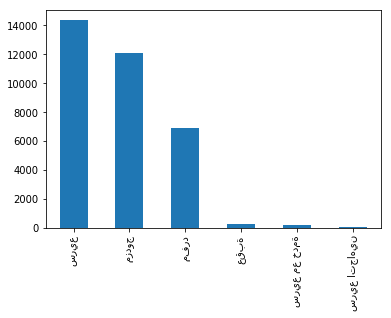

In [9]:
data.Road_Type.value_counts().plot(kind="bar");

Quicklook into Accident_Type

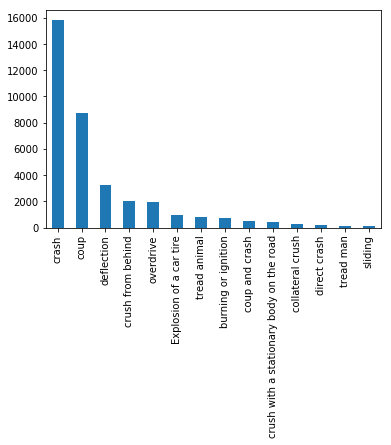

In [10]:
data.Accident_Type.value_counts().plot(kind="bar");

# Accidents Time

The cells in this section looks at the timing of the accidents in term of hour of day, day of week and month.

In [202]:
#  number of accident for each day
dates = pd.DataFrame(data.Accident_Date_G.value_counts().index, data.Accident_Date_G.value_counts(), columns=['date'])

In [203]:
#  this function as well as the next few cells are used to convert the date from a string into a datetime object
convertToDate = lambda dateString: datetime.date(int(dateString.split('/')[2]), int(dateString.split('/')[1]), int(dateString.split('/')[0]))

In [204]:
dates.reset_index(inplace=True)

In [205]:
dates.rename(columns={"Accident_Date_G": "Number_of_Accidents"}, inplace=True)

In [206]:
dates.head()

,Number_of_Accidents,date
0,100,24/02/2018
1,83,24/05/2017
2,82,16/02/2017
3,74,26/04/2017
4,74,24/08/2017


In [207]:
dates['date'] = dates['date'].apply(convertToDate)

In [208]:
# Now that they are datetime objects we can sort pert date
dates.sort_values(by= 'date', inplace=True)

In [209]:
dates.head()

,Number_of_Accidents,date
24,63,2017-01-01
330,45,2017-01-02
524,39,2017-01-03
189,51,2017-01-04
108,55,2017-01-05


In [210]:
dates.reset_index()

,index,Number_of_Accidents,date
0,24,63,2017-01-01
1,330,45,2017-01-02
2,524,39,2017-01-03
3,189,51,2017-01-04
4,108,55,2017-01-05
5,753,30,2017-01-06
6,104,55,2017-01-07
7,389,44,2017-01-08
8,453,41,2017-01-09
9,401,43,2017-01-10


In [211]:
#  a quicklook at how the data look like now
dates.head()

,Number_of_Accidents,date
24,63,2017-01-01
330,45,2017-01-02
524,39,2017-01-03
189,51,2017-01-04
108,55,2017-01-05


In [217]:
#  Now we break down the datetime object into individual day, month and year
lst = []
for date in dates.date:
    lst.append(date.weekday())

In [218]:
dates['day'] = lst

In [219]:
lst2 = []
for date in dates.date:
    lst2.append(date.month)

In [220]:
dates['month'] = lst2

In [221]:
lst3 = []
for date in dates.date:
    lst3.append(date.year)

In [222]:
dates['year'] = lst3

In [223]:
dates.head(n=10)

,Number_of_Accidents,date,day,month,year
24,63,2017-01-01,6,1,2017
330,45,2017-01-02,0,1,2017
524,39,2017-01-03,1,1,2017
189,51,2017-01-04,2,1,2017
108,55,2017-01-05,3,1,2017
753,30,2017-01-06,4,1,2017
104,55,2017-01-07,5,1,2017
389,44,2017-01-08,6,1,2017
453,41,2017-01-09,0,1,2017
401,43,2017-01-10,1,1,2017


In [224]:
# This is needed to change the days from a numeric value into string
day_mapper = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}

In [225]:
dates.replace({"day": day_mapper})

,Number_of_Accidents,date,day,month,year
24,63,2017-01-01,Sunday,1,2017
330,45,2017-01-02,Monday,1,2017
524,39,2017-01-03,Tuesday,1,2017
189,51,2017-01-04,Wednesday,1,2017
108,55,2017-01-05,Thursday,1,2017
753,30,2017-01-06,Friday,1,2017
104,55,2017-01-07,Saturday,1,2017
389,44,2017-01-08,Sunday,1,2017
453,41,2017-01-09,Monday,1,2017
401,43,2017-01-10,Tuesday,1,2017


The first visualization that we generate is of number of accidents per each day starting from January 2017 to April 2019. This shows a slightly declining trend.

Text(0.5, 0, 'Day')

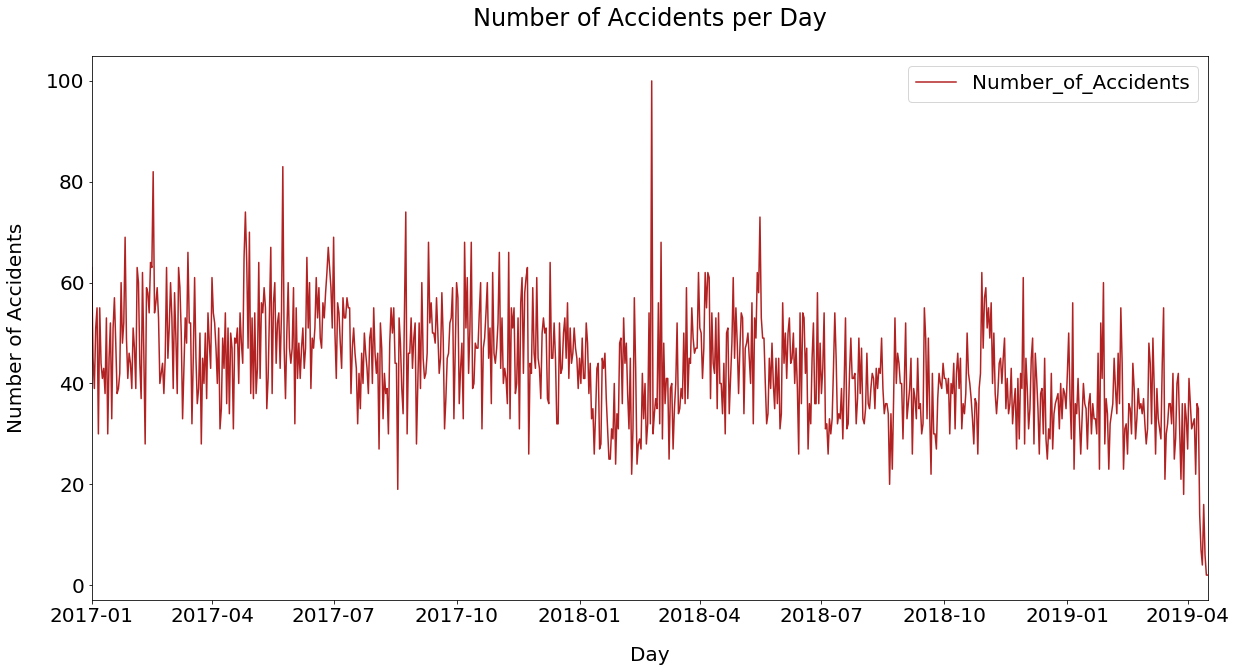

In [226]:
dates.plot('date','Number_of_Accidents', figsize=[20, 10], color= 'firebrick');
plt.title('Number of Accidents per Day', pad=30)
plt.ylabel('Number of Accidents', labelpad=20)
plt.xlabel('Day', labelpad=20)

Now we move to investigate the number of accidents per year and month. It is evident that the number of accidents in 2017 is the highest and in 2019 the lowest. The lower number of accidents in 2019 however is due to sampling as we have the data for only four months

In [227]:
accidents_day = dates.drop(["date"], axis=1)

In [228]:
accidents_day.drop(['day', 'month'], axis=1).groupby("year").sum()

,Number_of_Accidents
year,
2017,17632
2018,14842
2019,3542


The next graph shows the number of accidents per month in these two+ years. This is misleading as the lower number seen for the months after april is due to the data being limited to the end of April 2019. This is also does not account for how many Januarys are in the sample.

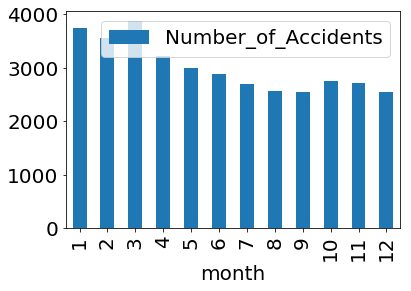

In [229]:
accidents_day.drop(['day', 'year'], axis=1).groupby("month").sum().plot(kind='bar')

The next graph adjusts for this sampling issue by showing only the results for 2017-2018

In [230]:
accidents_no_2019 = accidents_day[accidents_day['year'] != 2019]

Text(0.5, 0, 'Month')

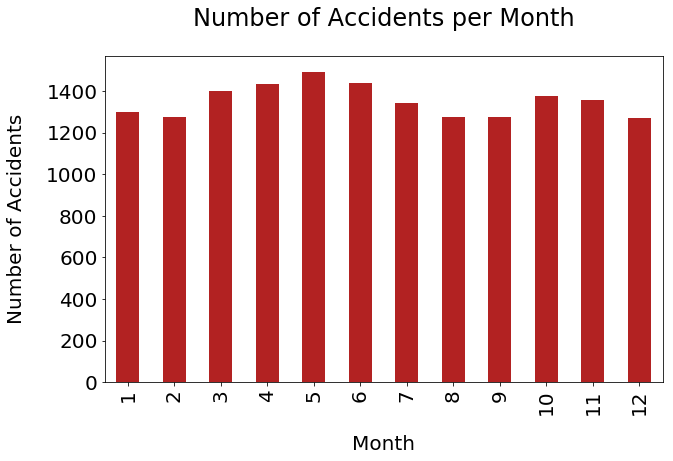

In [235]:
tmp = accidents_no_2019.drop(['day', 'year'], axis=1).groupby("month").sum()/2
tmp.plot(kind='bar', figsize=[10, 6], legend= False, color= 'firebrick')
plt.title('Number of Accidents per Month', pad=30)
plt.ylabel('Number of Accidents', labelpad=20)
plt.xlabel('Month', labelpad=20)

In the next cell, we see how many accidents occured in each day of the week. A drop in the number of accidents is seen on Friday which is the first day of the weekend in Saudi Arabia.

Text(0.5, 0, 'Day')

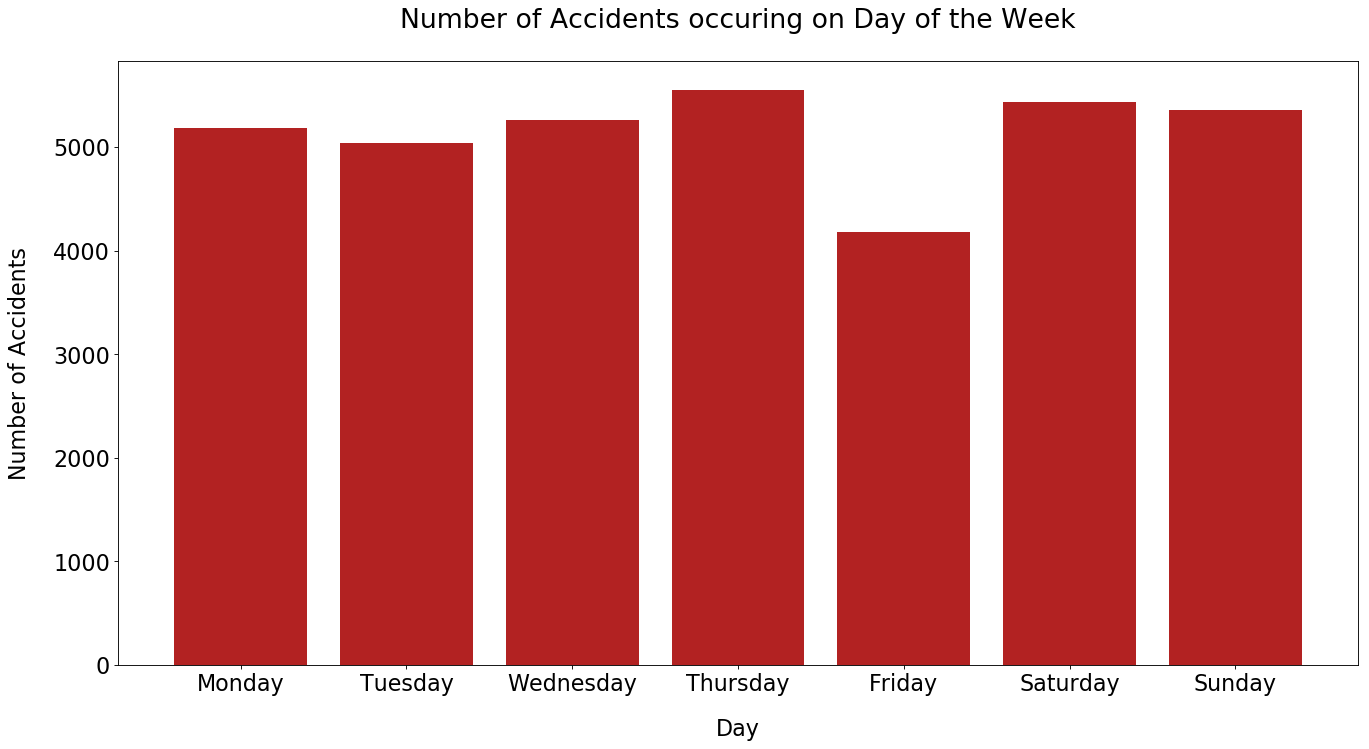

In [237]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],accidents_day.drop(['month', 'year'], axis=1).groupby("day").sum().Number_of_Accidents, color= 'firebrick')
plt.title('Number of Accidents occuring on Day of the Week', pad=30)
plt.ylabel('Number of Accidents', labelpad=20)
plt.xlabel('Day', labelpad=20)

This next part focuses on the time during the day at which accidents occured.

In [246]:
dates['time'] = pd.to_datetime(data.loc[dates.index].Accident_Time)

In [247]:
dates['time'] = [time.time() for time in dates['time']]

In [248]:
dates.head()

,Number_of_Accidents,date,day,month,year,time
24,63,2017-01-01,6,1,2017,22:25:00
330,45,2017-01-02,0,1,2017,14:00:00
524,39,2017-01-03,1,1,2017,02:30:00
189,51,2017-01-04,2,1,2017,13:30:00
108,55,2017-01-05,3,1,2017,14:00:00


In [249]:
#  A function to round to the nearest hour
def rounder(t):
    if t.minute >= 30:
        if t.hour+1 == 24:
            return t.replace(second=0, microsecond=0, minute=0, hour=0)
        return t.replace(second=0, microsecond=0, minute=0, hour=t.hour+1)
    else:
        return t.replace(second=0, microsecond=0, minute=0)

In [250]:
toNearestHour = lambda t: t.replace(second=0, microsecond=0, minute=0, hour=t.hour) + datetime.timedelta(hours=t.minute//30) 

In [251]:
dates["time"] = dates.time.apply(rounder)

This first graph shows the varying number of accidents that occured at each hour.

Text(0.5, 0, 'Time')

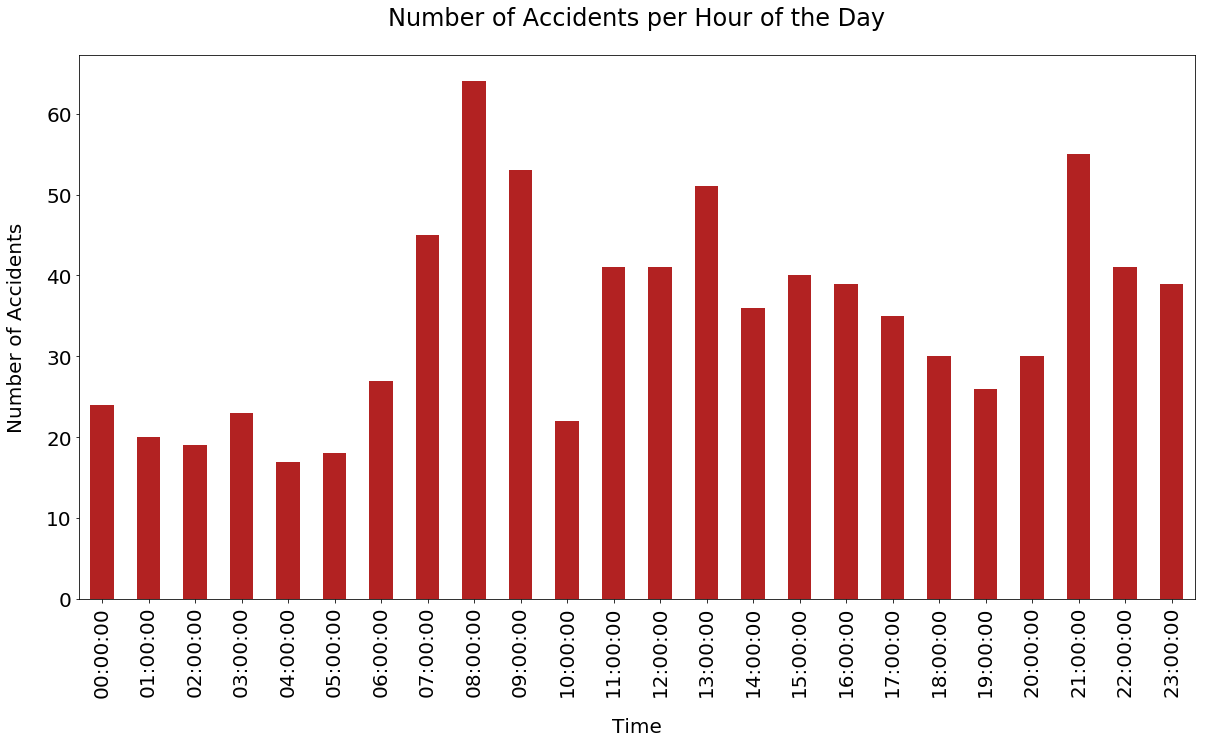

In [182]:
dates[["Number_of_Accidents", "time"]].groupby('time').count().plot(kind="bar", figsize= [20, 10], legend= False, color= 'firebrick')
plt.title('Number of Accidents per Hour of the Day', pad=30)
plt.ylabel('Number of Accidents', labelpad=20)
plt.xlabel('Time', labelpad=20)

The following graphs illustrate that the trends seen in the previous graph are consistent through out the years

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e19c5c320>],
      dtype=object)

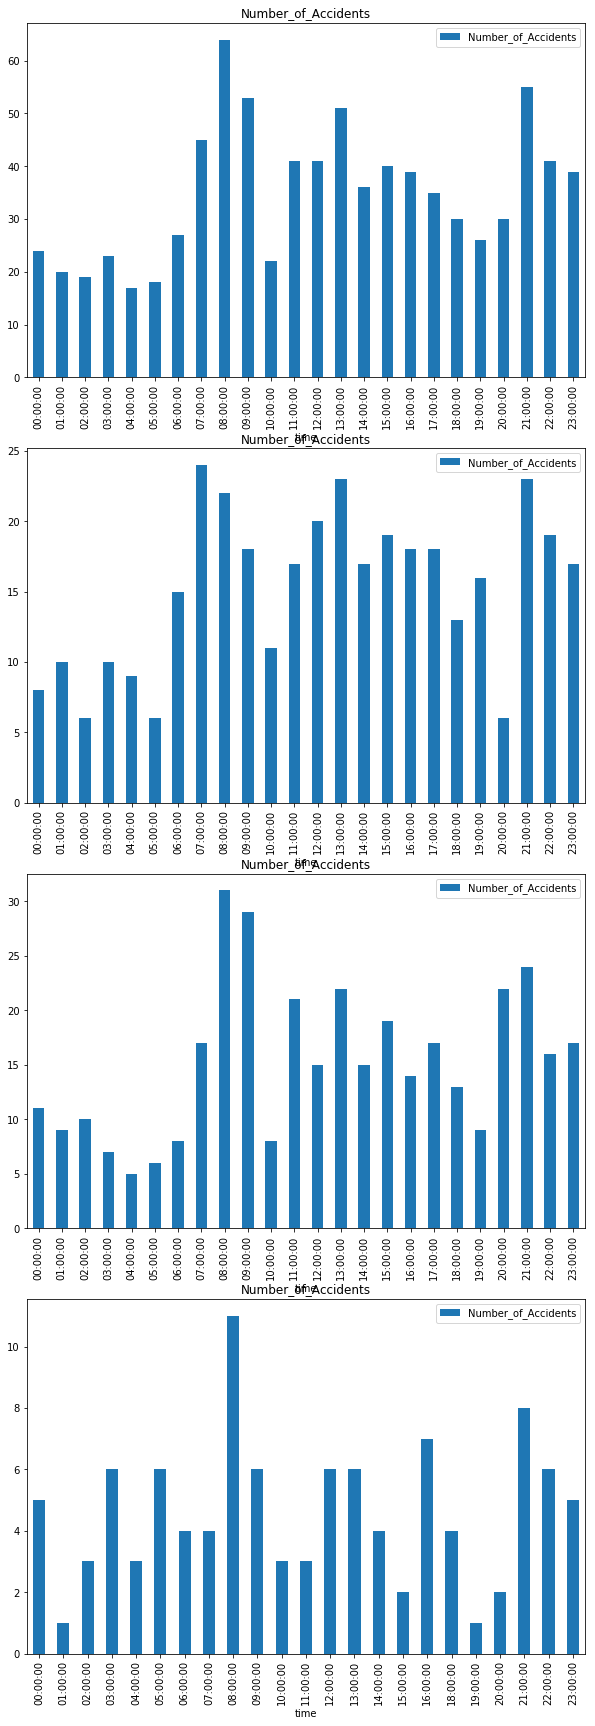

In [127]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize= [10, 30])
dates[["Number_of_Accidents", "time"]].groupby('time').count().plot(ax=axes[0], kind="bar", subplots=True)
temp = dates[dates['year']==2017]
temp[["Number_of_Accidents", "time"]].groupby('time').count().plot(ax=axes[1], kind="bar", subplots=True)
temp = dates[dates['year']==2018]
temp[["Number_of_Accidents", "time"]].groupby('time').count().plot(ax=axes[2], kind="bar", subplots=True)
temp = dates[dates['year']==2019]
temp[["Number_of_Accidents", "time"]].groupby('time').count().plot(ax=axes[3], kind="bar", subplots=True)

The following graphs are quick attempts to see if there is seasonality in the trend observed earlier

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e19eb2240>],
      dtype=object)

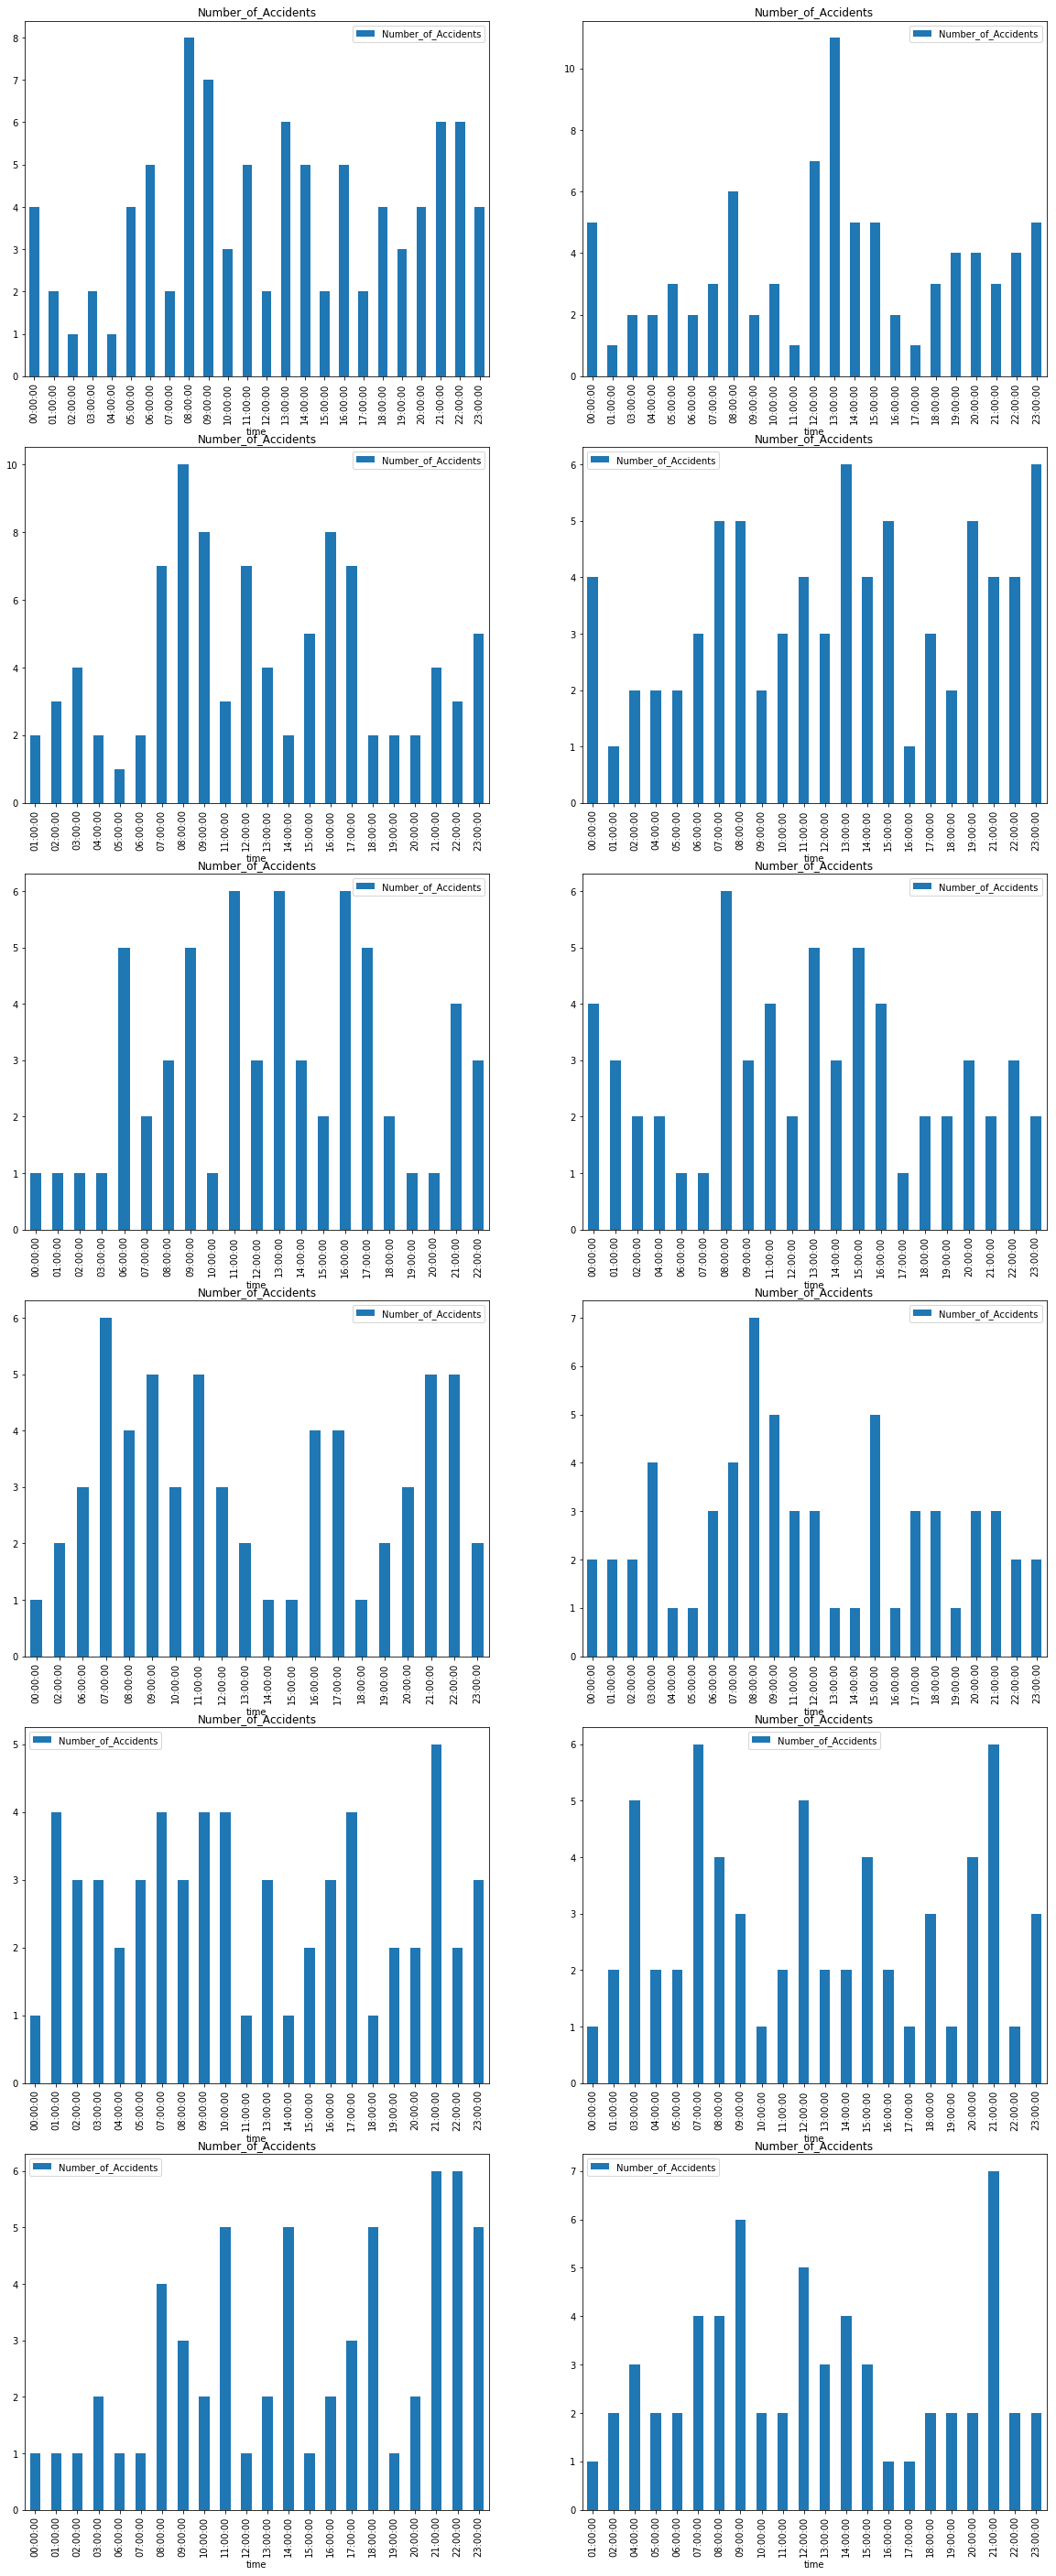

In [128]:
# By month
fig, axes = plt.subplots(nrows=6, ncols=2, figsize= [20, 50])
# dates[["Number_of_Accidents", "time"]].groupby('time').count().plot(ax=axes[0], kind="bar", subplots=True)
temp = dates[dates['month']== 1]
temp[["Number_of_Accidents", "time"]].groupby('time').count().plot(ax=axes[0, 0], kind="bar", subplots=True)
temp = dates[dates['month']== 2]
temp[["Number_of_Accidents", "time"]].groupby('time').count().plot(ax=axes[0, 1], kind="bar", subplots=True)# temp = dates[dates['year']==2019]
temp = dates[dates['month']== 3]
temp[["Number_of_Accidents", "time"]].groupby('time').count().plot(ax=axes[1, 0], kind="bar", subplots=True)
temp = dates[dates['month']== 4]
temp[["Number_of_Accidents", "time"]].groupby('time').count().plot(ax=axes[1, 1], kind="bar", subplots=True)
temp = dates[dates['month']== 5]
temp[["Number_of_Accidents", "time"]].groupby('time').count().plot(ax=axes[2, 0], kind="bar", subplots=True)
temp = dates[dates['month']== 6]
temp[["Number_of_Accidents", "time"]].groupby('time').count().plot(ax=axes[2, 1], kind="bar", subplots=True)
temp = dates[dates['month']== 7]
temp[["Number_of_Accidents", "time"]].groupby('time').count().plot(ax=axes[3, 0], kind="bar", subplots=True)
temp = dates[dates['month']== 8]
temp[["Number_of_Accidents", "time"]].groupby('time').count().plot(ax=axes[3, 1], kind="bar", subplots=True)
temp = dates[dates['month']== 9]
temp[["Number_of_Accidents", "time"]].groupby('time').count().plot(ax=axes[4, 0], kind="bar", subplots=True)
temp = dates[dates['month']== 10]
temp[["Number_of_Accidents", "time"]].groupby('time').count().plot(ax=axes[4, 1], kind="bar", subplots=True)
temp = dates[dates['month']== 11]
temp[["Number_of_Accidents", "time"]].groupby('time').count().plot(ax=axes[5, 0], kind="bar", subplots=True)
temp = dates[dates['month']== 12]
temp[["Number_of_Accidents", "time"]].groupby('time').count().plot(ax=axes[5, 1], kind="bar", subplots=True)

# Accidents Location

The following section explores the geographical location of the accidents and accidents with fatality.

The following cell is a more elaborate attempt at visualizing the number of accidents per region

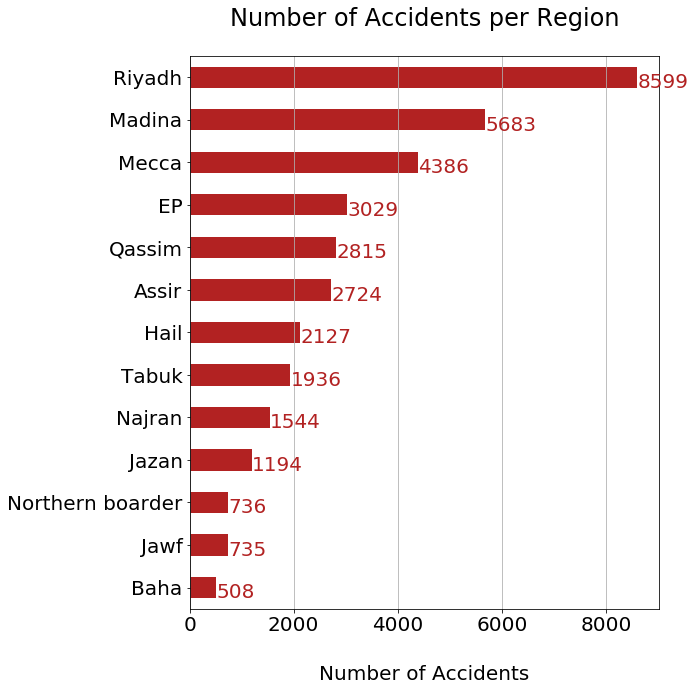

In [253]:
fig, ax = plt.subplots()  
plt.title('Number of Accidents per Region', pad=30)
plt.xlabel('Number of Accidents', labelpad=30)
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)
data.Region.value_counts().plot(kind='barh', figsize= [10, 10], color= 'firebrick')
plt.gca().invert_yaxis()

# this is to annotate the number of accidents next to each bar
for i, v in enumerate(data.Region.value_counts()):
    ax.text(v + 3, i + .25, str(v), color='firebrick', fontweight='normal')
ax.xaxis.grid()
    
fig.tight_layout()


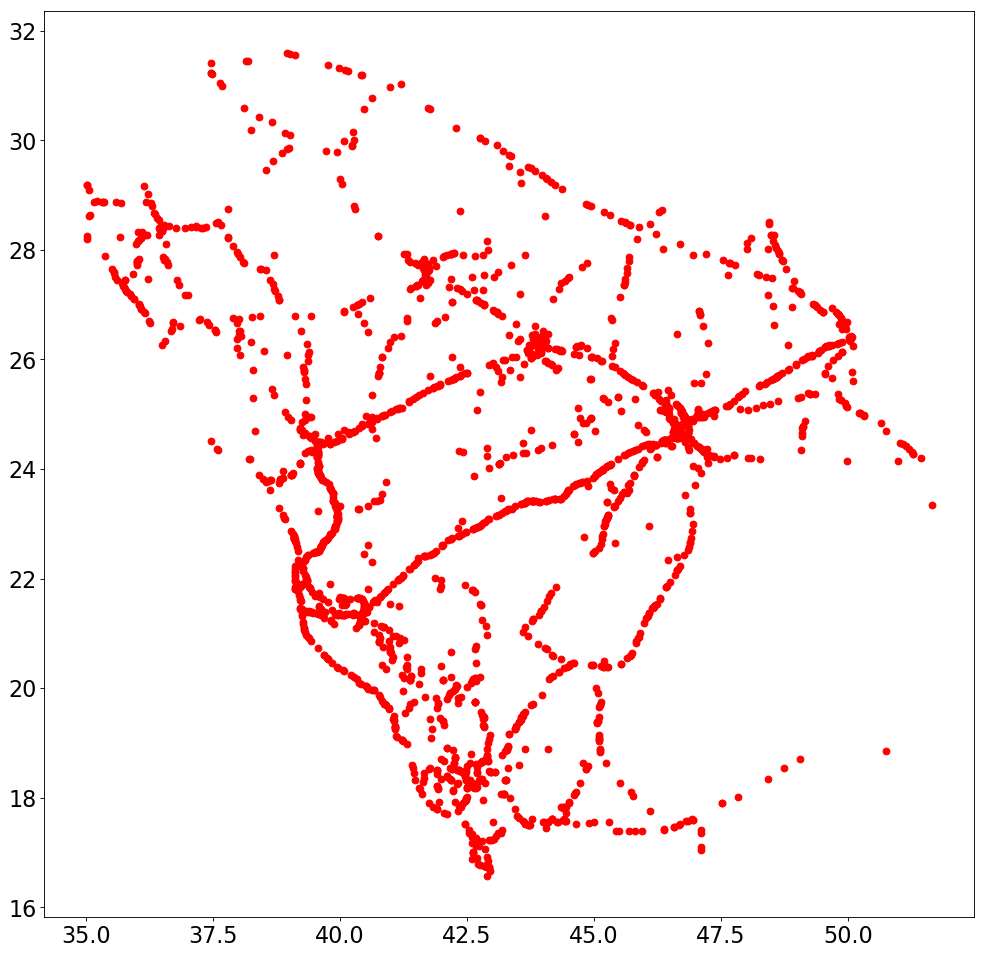

In [252]:
data_with_coor = data[~data.long.isnull()]
data_with_coor_and_fatality = data_with_coor[data_with_coor.Dead_Number>0]
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data_with_coor_and_fatality.long, data_with_coor_and_fatality.lat, color='r');

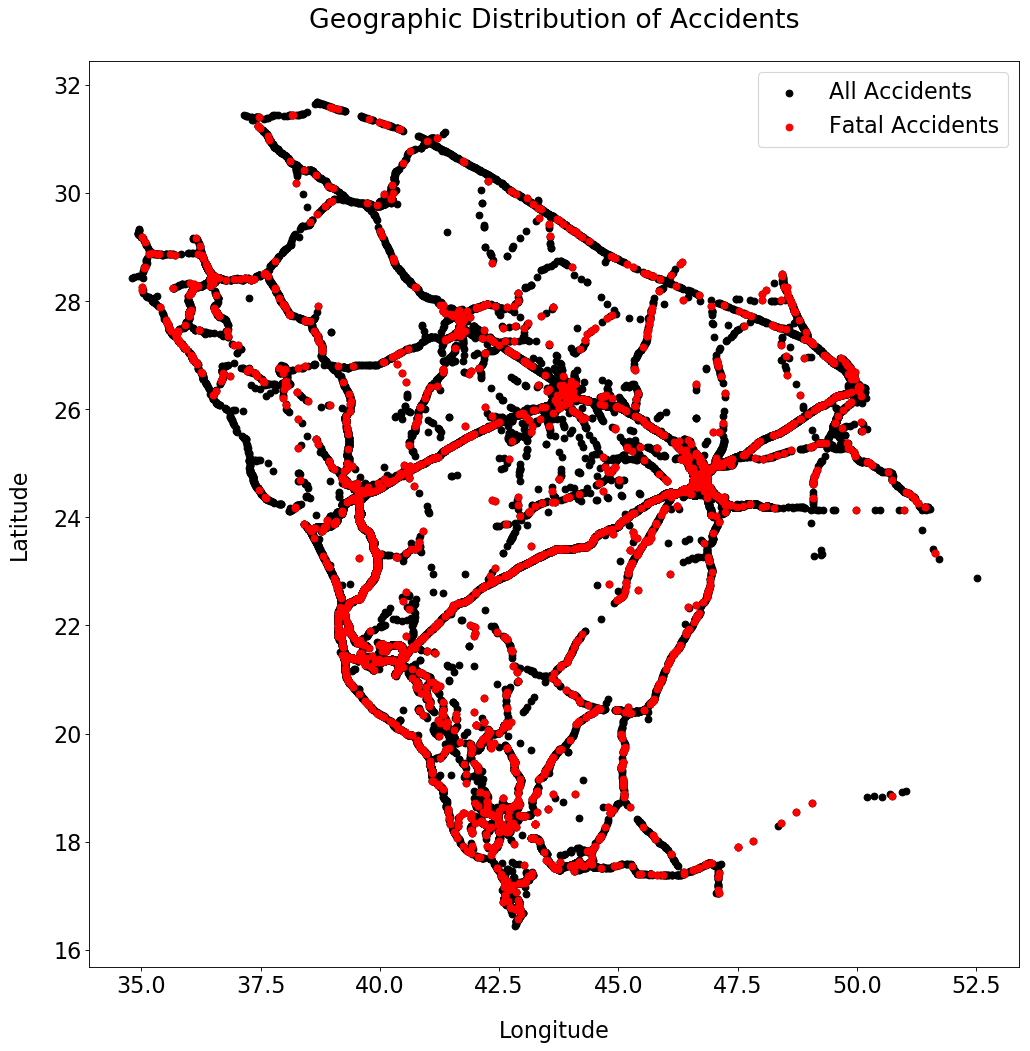

In [58]:
# fig, ax = plt.subplots()  

plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data[~data.long.isnull()].long, data[~data.long.isnull()].lat, color='k', label='All Accidents')
plt.scatter(data_with_coor_and_fatality.long, data_with_coor_and_fatality.lat, color='r', label='Fatal Accidents');
plt.title('Geographic Distribution of Accidents', pad=30)
plt.ylabel('Latitude', labelpad=20)
plt.xlabel('Longitude', labelpad=20)
plt.legend(loc='upper right')
# plt.ylim(-1.5, 2.0)
plt.show()

The below cell explores the causes for these accidents. Unfortunately, the majority of accidents are attributed to the driver

Text(0.5, 0, 'Causes')

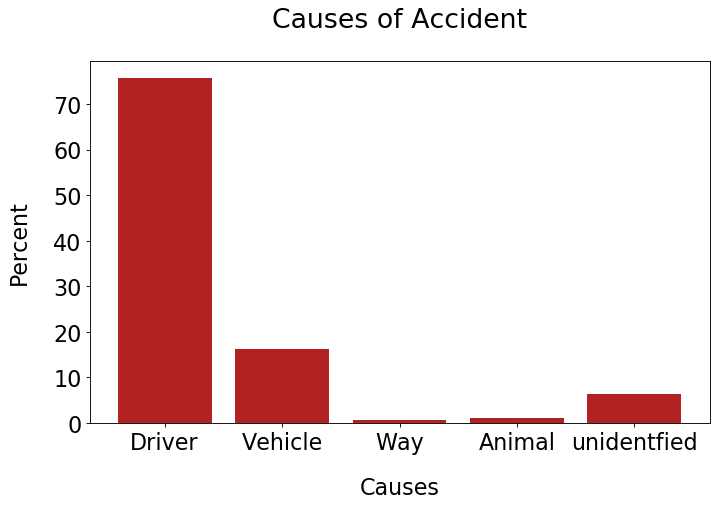

In [167]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
lst = [data.Driver.sum(), data.Vehicle.sum(), data.Way.sum(), data.Animal.sum(), data.shape[0]-sum([data.Driver.sum(), data.Vehicle.sum(), data.Way.sum(), data.Animal.sum()])]
plt.bar(['Driver', 'Vehicle', 'Way', 'Animal', 'unidentfied'], [item*100 for item in lst]/sum(lst), color='firebrick')
plt.title('Causes of Accident', pad=30)
plt.ylabel('Percent', labelpad=20)
plt.xlabel('Causes', labelpad=20)